In [3]:
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data = pd.read_excel("Inflationrate.xlsx")
data

,Date,Ukraine,Russie,UE,United States,Canada
0,2021-05-01,9.5,6.02,2.0,5.0,3.6
1,2021-06-01,9.5,6.50,2.2,5.4,3.1
2,2021-07-01,10.2,6.50,2.5,5.4,3.7
3,2021-08-01,10.2,6.68,3.2,5.3,4.1
4,2021-09-01,11.0,7.40,3.6,5.4,4.4
5,2021-10-01,10.9,8.13,4.4,6.2,4.7
6,2021-11-01,10.3,8.40,5.2,6.8,4.7
7,2021-12-01,10.0,8.39,5.3,7.0,4.8
8,2022-01-01,10.0,8.73,5.6,7.5,5.1
9,2022-02-01,10.7,9.20,6.2,7.9,5.7


In [5]:
data_to_focus = data[["Ukraine", "Russie"]]
data_to_focus

,Ukraine,Russie
0,9.5,6.02
1,9.5,6.50
2,10.2,6.50
3,10.2,6.68
4,11.0,7.40
5,10.9,8.13
6,10.3,8.40
7,10.0,8.39
8,10.0,8.73
9,10.7,9.20


In [41]:
# This function will generate a dataframe out of a time series list
def time_to_df(list1, number_of_attributes = 3):
    df = pd.DataFrame(columns=range(number_of_attributes))
    
    for i in range(len(list1)-number_of_attributes+1):
        record = []
        for j in range(i,i+number_of_attributes):
            record.append(list1[j])
        df.loc[len(df.index)] = record
        
        
    return df

# This function trains the model using the input data(dataframe)
def train_and_forecast(list1, number_of_forecast = 5, number_of_attributes = 3):

    input1 = time_to_df(list1, number_of_attributes)
    # We take last column of the features as target and rest are taken as attributes
    featureMat = input1.iloc[:, : len(input1.columns) - 1]
    label = input1[input1.columns[-1]]
    train_features, test_features, train_res, test_res= train_test_split(featureMat,label,test_size=0.15, random_state = 50)
    
    # Here we are using linear regression model
    model = linear_model.LinearRegression()
    model.fit(train_features, train_res)
    print(model.score(test_features,test_res))
    
    # Checking for the score
    #print("Score (R2 score): ", model.score(test_features, test_res))
    forecasted_values = []
    
    for i in range(number_of_forecast):
        
        features_for_forecast = list1[-number_of_attributes+1:]
        forecasted_value = int(model.predict([features_for_forecast])[0]*10)/10
        forecasted_values.append(forecasted_value)
        list1.append(forecasted_value)
        
    print("Forcasted values: ", forecasted_values)
    return forecasted_values


date = data["Date"].to_list()



Ukraine inflation monthly prediction starting from 2022-05-01 :--->
-1.1369465675597366
Forcasted values:  [18.8, 19.2, 19.4, 19.5, 19.6]


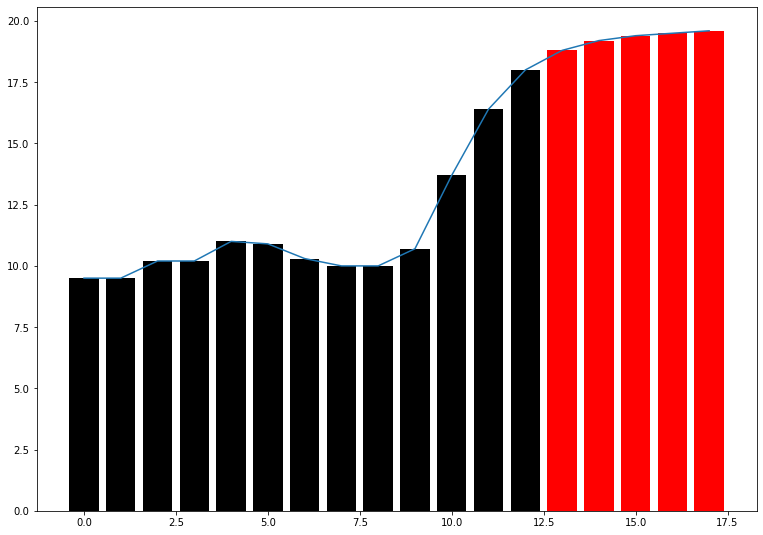

In [45]:
print("Ukraine inflation monthly prediction starting from 2022-05-01 :--->")

forcasted = train_and_forecast(data_to_focus["Ukraine"].to_list(), number_of_forecast = 5, number_of_attributes = 3)
U = data_to_focus["Ukraine"].to_list()
colors = ["Black" for i in U]
for i in forcasted:
    U.append(i)
    colors.append("Red")

fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0,0,1,1])


ax.plot(U)
ax.bar(range(len(U)),U,color = colors)
plt.show()

Russie inflation monthly prediction starting from 2022-05-01 :--->
-88.96908005075845
Forcasted values:  [16.3, 15.5, 14.8, 14.2, 13.7]


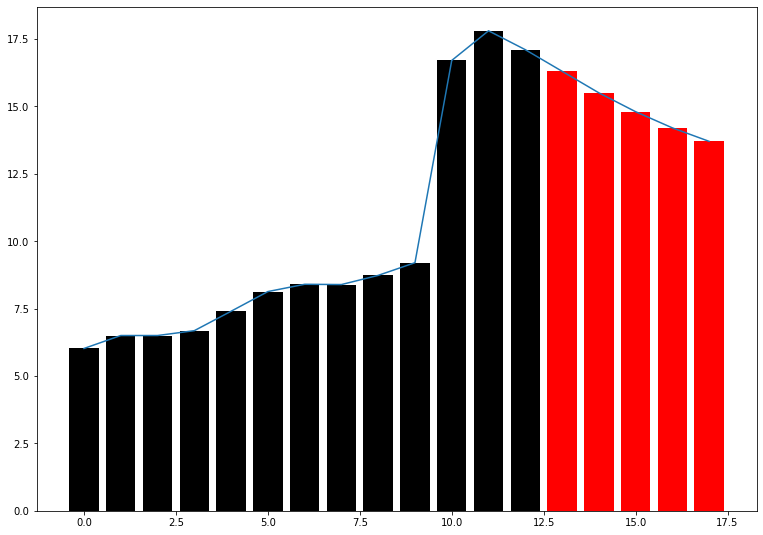

In [46]:
print("Russie inflation monthly prediction starting from 2022-05-01 :--->")

forcasted = train_and_forecast(data_to_focus["Russie"].to_list(), number_of_forecast = 5, number_of_attributes = 3)

U = data_to_focus["Russie"].to_list()
colors = ["Black" for i in U]
for i in forcasted:
    U.append(i)
    colors.append("Red")

fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0,0,1,1])


ax.plot(U)
ax.bar(range(len(U)),U,color = colors)
plt.show()